Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
boston.DESCR

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [7]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.columns=boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


boston.target contains the housing prices.

In [9]:
boston.target[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [10]:
bos['Price']=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


n this section I am going to  fit a linear regression model and predict the Boston housing prices. I will use the least squares method as the way to estimate the coefficients.

Y = boston housing price(also called “target” data in Python)

and

X = all the other features (or independent variables)

Then I am going to drop the price column as I want only the parameters as my X values.  I am going to store linear regression object in a variable called lm.

In [11]:
X=bos.drop('Price', axis=1)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

Fitting a Linear Model

In [13]:
lm.fit(X, bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print("Estimated intercept coefficient:", lm.intercept_)

Estimated intercept coefficient: 36.49110328036135


In [15]:
print("Number of coefficient", len(lm.coef_))

Number of coefficient 13


In [42]:
pd.DataFrame(lm.coef_.tolist(), X.columns)

,0
CRIM,-0.107171
ZN,0.046395
INDUS,0.020860
CHAS,2.688561
NOX,-17.795759
RM,3.804752
AGE,0.000751
DIS,-1.475759
RAD,0.305655
TAX,-0.012329


As you can see from the data frame that there is a high correlation between RM and prices. Lets plot a scatter plot between True housing prices and True RM.

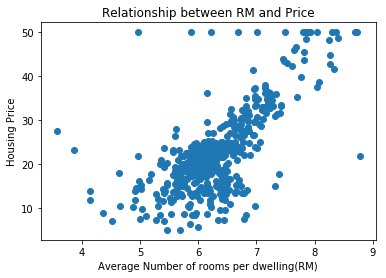

In [43]:
plt.scatter(bos.RM, bos.Price)
plt.xlabel("Average Number of rooms per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")
plt.show()

# Predicting Prices

I am going to calculate the predicted prices (Y^i)  using lm.predict. Then I display the first 5 housing prices. These are my predicted housing prices.

In [44]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

plotting a scatter plot to compare true prices and the predicted prices.

Text(0.5,1,'Prices Vs Predicted Prices: $Y_i$ Vs $\\hat{Y}_i$')

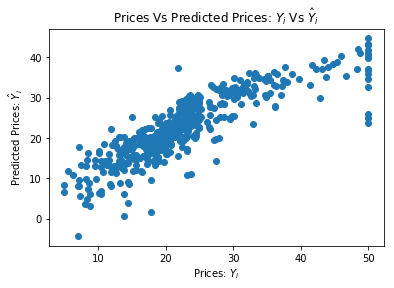

In [45]:
plt.scatter(bos.Price, lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted Prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted Prices: $Y_i$ Vs $\hat{Y}_i$")

notice that there is some error in  the prediction as the housing prices increase.
calculating the mean squared error.

In [47]:
mseFull = np.mean((bos.Price, lm.predict(X)))
print(mseFull)

22.532806324110677


regression for  one feature the error will be very high. Lets take the feature ‘PTRATIO’ and calculate the mean squared error.

In [51]:
lm.fit(X[['PTRATIO']], bos.Price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
msePTRATIO = np.mean((bos.Price - lm.predict(X[['PTRATIO']])) **2)
print(msePTRATIO)

62.65220001376927


# Training and validation data sets

In [62]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
X_train, X_test, Y_train, Y_test = train_test_split(X, bos.Price, test_size=0.33, random_state=5)
print (X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(339, 13) (167, 13) (339,) (167,)


 building a linear regression model using my  train-test data sets.

In [64]:
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [67]:
print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((Y_train - lm.predict(X_train)) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((Y_test - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534684
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367275618253


Text(0,0.5,'Residuals')

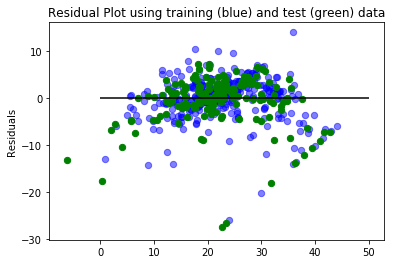

In [68]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')